In [1]:
import sys
COMP_NAME = "icecube-neutrinos-in-deep-ice"
sys.path.append(f"/home/anjum/kaggle/{COMP_NAME}/")

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances

from src.config import INPUT_PATH, OUTPUT_PATH

In [2]:
batch = pd.read_parquet(INPUT_PATH / "train" / "batch_1.parquet")
event_24 = batch.loc[24]
event_24

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True
...,...,...,...,...
24,3452,17812,0.725,True
24,48,18053,0.975,True
24,3267,18095,1.125,True


In [3]:
event_24["sensor_id"].value_counts()

557     4
5057    3
3050    2
3496    2
558     2
3609    2
3267    2
3520    2
1970    2
3276    1
4831    1
613     1
554     1
560     1
4571    1
3699    1
300     1
2421    1
3438    1
2261    1
3115    1
4528    1
2448    1
3289    1
4904    1
3452    1
48      1
975     1
3918    1
973     1
972     1
5041    1
2948    1
860     1
2440    1
1743    1
2977    1
5059    1
3161    1
2959    1
1397    1
3387    1
1583    1
1940    1
1241    1
1405    1
4157    1
553     1
104     1
Name: sensor_id, dtype: int64

In [4]:
data = torch.load(INPUT_PATH / "train_events" / "batch_1" / "event_24.pt")
data

Data(x=[61, 7], y=[2], n_pulses=61)

In [5]:
xyz = data.x[:, :3].numpy()
xyz

array([[ 0.60682,  0.67128,  0.41316],
       [-0.2909 ,  0.74848,  0.42546],
       [ 1.01054,  0.51576, -0.3492 ],
       [ 1.01054,  0.51576, -0.3492 ],
       [-0.01936, -0.159  ,  0.362  ],
       [ 1.15274,  0.34184,  0.71576],
       [-0.58132, -0.61476,  0.32722],
       [-1.05326, -0.0312 , -0.35634],
       [ 1.00086, -0.1169 ,  0.90158],
       [-0.6272 ,  0.47488,  0.69602],
       [-0.6272 ,  0.47488,  0.69602],
       [-0.01936, -0.159  , -0.41094],
       [-0.01936, -0.159  , -0.41094],
       [-0.01936, -0.159  , -0.41094],
       [ 1.15274,  0.34184, -0.27144],
       [-0.01936, -0.159  , -0.43898],
       [ 1.01054,  0.51576,  0.4678 ],
       [ 1.01054,  0.51576,  0.4678 ],
       [-0.4699 ,  0.28088, -0.39558],
       [ 1.15274,  0.34184,  0.3413 ],
       [-0.4913 , -0.38098,  0.42426],
       [-0.64878, -0.18686, -0.7018 ],
       [-0.64878, -0.18686, -0.7018 ],
       [ 0.51462,  0.42332,  0.08972],
       [ 0.24994, -0.2625 ,  0.20436],
       [-0.64878, -0.1868

In [6]:
mat = pairwise_distances(xyz)
mat.shape

(61, 61)

In [12]:
from torchmetrics.functional import pairwise_euclidean_distance

mat2 = pairwise_euclidean_distance(data.x[:, :3])

In [13]:
mat[:4, :4]

array([[0.        , 0.90111727, 0.87656665, 0.87656665],
       [0.90111727, 0.        , 1.5323194 , 1.5323194 ],
       [0.87656665, 1.5323194 , 0.        , 0.        ],
       [0.87656665, 1.5323194 , 0.        , 0.        ]], dtype=float32)

In [14]:
mat2[:4, :4]

tensor([[0.0000, 0.9011, 0.8766, 0.8766],
        [0.9011, 0.0000, 1.5323, 1.5323],
        [0.8766, 1.5323, 0.0000, 0.0000],
        [0.8766, 1.5323, 0.0000, 0.0000]])

In [8]:
n_nodes = xyz.shape[0]
dists = []
mat = pairwise_distances(xyz)
mat = mat + np.eye(n_nodes) * 1000

for i in range(xyz.shape[0]):
    masked_mat = mat[:i+1, :i+1]
    
    if i == 0:
        dists.append(0)
    else:
        dists.append(masked_mat[i].min())
        
dists

[0,
 0.9011172652244568,
 0.8765666484832764,
 0.0,
 0.9493582844734192,
 0.7057805061340332,
 0.7243796586990356,
 1.0151472091674805,
 0.5177248120307922,
 0.5110356211662292,
 0.0,
 0.7729399800300598,
 0.0,
 0.0,
 0.23773016035556793,
 0.028040021657943726,
 0.3345940411090851,
 0.0,
 0.6298545002937317,
 0.257820188999176,
 0.2686511278152466,
 0.5542352199554443,
 0.0,
 0.4178497791290283,
 0.3287629783153534,
 0.2710530757904053,
 0.7827110886573792,
 0.5310624837875366,
 0.0,
 0.03404000401496887,
 0.0,
 0.0,
 0.0,
 0.27233999967575073,
 0.4237472116947174,
 0.0,
 0.1361599862575531,
 0.25344160199165344,
 0.034060001373291016,
 0.5024781227111816,
 0.06807997822761536,
 0.06808000802993774,
 0.034039974212646484,
 0.5293720364570618,
 0.30448633432388306,
 0.32081255316734314,
 0.2605630159378052,
 0.7863513827323914,
 0.24992969632148743,
 0.25137859582901,
 0.4343661367893219,
 0.3064289689064026,
 0.44921061396598816,
 0.26011523604393005,
 0.29826557636260986,
 0.229523301

In [9]:
dists = np.array(dists)

dists.mean()

0.3262412946243755

In [10]:
norm_dists = (dists - 0.25) / 0.25
norm_dists

array([-1.00000000e+00,  2.60446906e+00,  2.50626659e+00, -1.00000000e+00,
        2.79743314e+00,  1.82312202e+00,  1.89751863e+00,  3.06058884e+00,
        1.07089925e+00,  1.04414248e+00, -1.00000000e+00,  2.09175992e+00,
       -1.00000000e+00, -1.00000000e+00, -4.90793586e-02, -8.87839913e-01,
        3.38376164e-01, -1.00000000e+00,  1.51941800e+00,  3.12807560e-02,
        7.46045113e-02,  1.21694088e+00, -1.00000000e+00,  6.71399117e-01,
        3.15051913e-01,  8.42123032e-02,  2.13084435e+00,  1.12424994e+00,
       -1.00000000e+00, -8.63839984e-01, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00,  8.93599987e-02,  6.94988847e-01, -1.00000000e+00,
       -4.55360055e-01,  1.37664080e-02, -8.63759995e-01,  1.00991249e+00,
       -7.27680087e-01, -7.27679968e-01, -8.63840103e-01,  1.11748815e+00,
        2.17945337e-01,  2.83250213e-01,  4.22520638e-02,  2.14540553e+00,
       -2.81214714e-04,  5.51438332e-03,  7.37464547e-01,  2.25715876e-01,
        7.96842456e-01,  

(array([19.,  1., 14.,  6.,  5.,  5.,  2.,  4.,  3.,  2.]),
 array([-1.        , -0.59394112, -0.18788223,  0.21817665,  0.62423553,
         1.03029442,  1.4363533 ,  1.84241219,  2.24847107,  2.65452995,
         3.06058884]),
 <BarContainer object of 10 artists>)

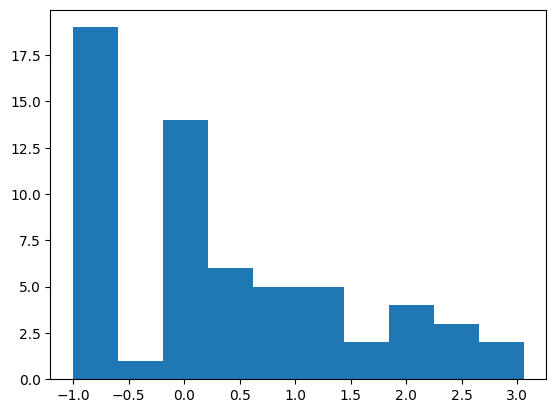

In [11]:
plt.hist(norm_dists)

In [69]:
t, indices = torch.sort(data.x[:, 3])  # Data objects no not preserve order
data.x = data.x[indices]

t_norm = 2 * (t - t.min()) / (t.max() - t.min()) - 1
t_norm

tensor([-1.0000, -0.9715, -0.9139, -0.8875, -0.6755, -0.6648, -0.6404, -0.6108,
        -0.5964, -0.5799, -0.5734, -0.5697, -0.3986, -0.3821, -0.3389, -0.2805,
        -0.2490, -0.2299, -0.2223, -0.2129, -0.1927, -0.1623, -0.0425, -0.0417,
        -0.0407, -0.0385, -0.0214, -0.0156, -0.0066,  0.0140,  0.0195,  0.0372,
         0.0448,  0.0448,  0.0517,  0.0918,  0.1194,  0.2322,  0.2634,  0.2753,
         0.3119,  0.3237,  0.4166,  0.4371,  0.4766,  0.4815,  0.4844,  0.5255,
         0.5323,  0.5396,  0.5806,  0.6546,  0.6723,  0.7162,  0.7199,  0.8052,
         0.8139,  0.8507,  0.8571,  0.8582,  1.0000])

In [76]:
charge = data.x[:, 4]
cum_charge = torch.cumsum(10 ** (3 * charge), 0)


charge_norm = 2 * (cum_charge - cum_charge.min()) / (cum_charge.max() - cum_charge.min()) - 1
charge_norm

tensor([-1.0000, -0.9603, -0.9290, -0.9214, -0.8681, -0.8453, -0.7904, -0.7642,
        -0.7295, -0.5951, -0.5689, -0.5342, -0.4877, -0.4598, -0.4336, -0.4260,
        -0.3981, -0.3669, -0.3288, -0.3060, -0.2713, -0.2519, -0.2443, -0.2029,
        -0.1648, -0.1319, -0.0904, -0.0659, -0.0600,  0.0034,  0.0161,  0.0321,
         0.0702,  0.1099,  0.1327,  0.1454,  0.1699,  0.1944,  0.2206,  0.2620,
         0.3068,  0.3314,  0.3728,  0.4007,  0.4269,  0.4801,  0.4996,  0.5190,
         0.5469,  0.5917,  0.6314,  0.6729,  0.6957,  0.7320,  0.7785,  0.8267,
         0.8512,  0.8842,  0.9222,  0.9704,  1.0000])

In [77]:
charge

tensor([ 0.0407,  0.0233, -0.0113, -0.2159,  0.0658, -0.0569,  0.0703, -0.0369,
         0.0036,  0.1998, -0.0369,  0.0036,  0.0461, -0.0278, -0.0369, -0.2159,
        -0.0278, -0.0113,  0.0171, -0.0569,  0.0036, -0.0801, -0.2159,  0.0294,
         0.0171, -0.0037,  0.0294, -0.0466, -0.2523,  0.0910, -0.1420, -0.1078,
         0.0171,  0.0233, -0.0569, -0.1420, -0.0466, -0.0466, -0.0369,  0.0294,
         0.0407, -0.0466,  0.0294, -0.0278, -0.0369,  0.0658, -0.0801, -0.0801,
        -0.0278,  0.0407,  0.0233,  0.0294, -0.0569,  0.0105,  0.0461,  0.0513,
        -0.0466, -0.0037,  0.0171,  0.0513, -0.0193])

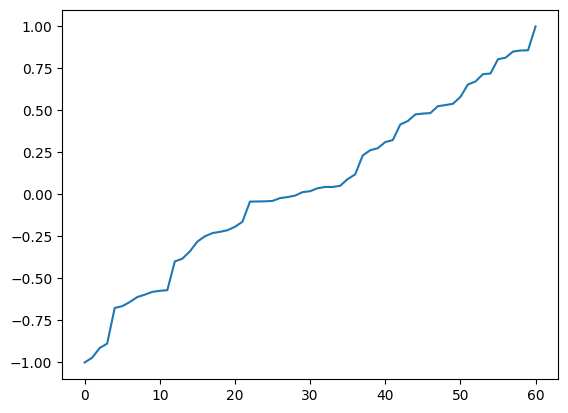

In [78]:
plt.plot(t_norm.numpy())

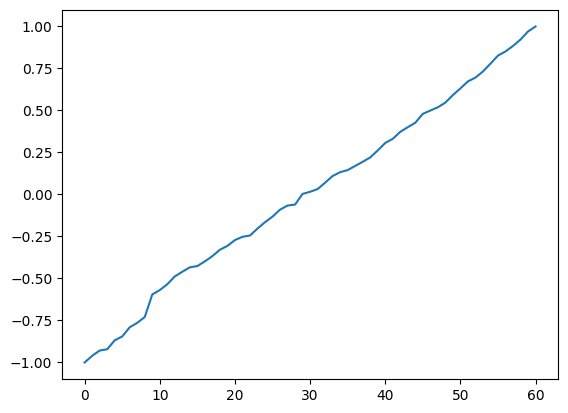

In [79]:
plt.plot(charge_norm.numpy())